## ME460 Linkages - Prof. Mark Ganter
# 12 position path generator via dyad-standard equations using a combination of Kimbrell's and Kramer's SPS techniques

psl = 323.862184443582 0
 *** relative solution ***

res.fun= 1.7938474394733472
res.x= < 1.7761282464782555 -165.31347379205022 3.2825686244251133 9.4511511441963 > 22.070249624904573 44.276279696090725 72.56936223053538 107.62421983494912 144.00030662007796 177.0946330742924 204.4916413258259 227.89930464418822 249.86694654352723 275.4827225300695 317.7517604019093
abs(posl1)= 0.00295
abs(posl2)= 0.602
abs(posl3)= 0.396
abs(posl4)= 0.0454
abs(posl5)= 0.362
abs(posl6)= 0.366
abs(posl7)= 0.0701
abs(posl8)= 0.249
abs(posl9)= 0.448
abs(posl10)= 0.266
abs(posl11)= 0.244
abs(posl12)= 0.781

psr = 184.731609121141 0

*** right side solution ***

res.fun= 0.08225704559009397
res.x=< 1.498157108600309 125.84583572289876 3 -19.724887219011997 > -19.283875680033823 -11.11993273398536 366.89941651263604 24.820450805488814 35.509078301795235 43.49580072396693 51.394299126485656 58.68751937574843 57.42063433553632 402.516412339302 380.0571778363844
abs(posr1)= 0.00242
abs(posr2)= 0.0184
abs(posr3)

<IPython.core.display.Javascript object>


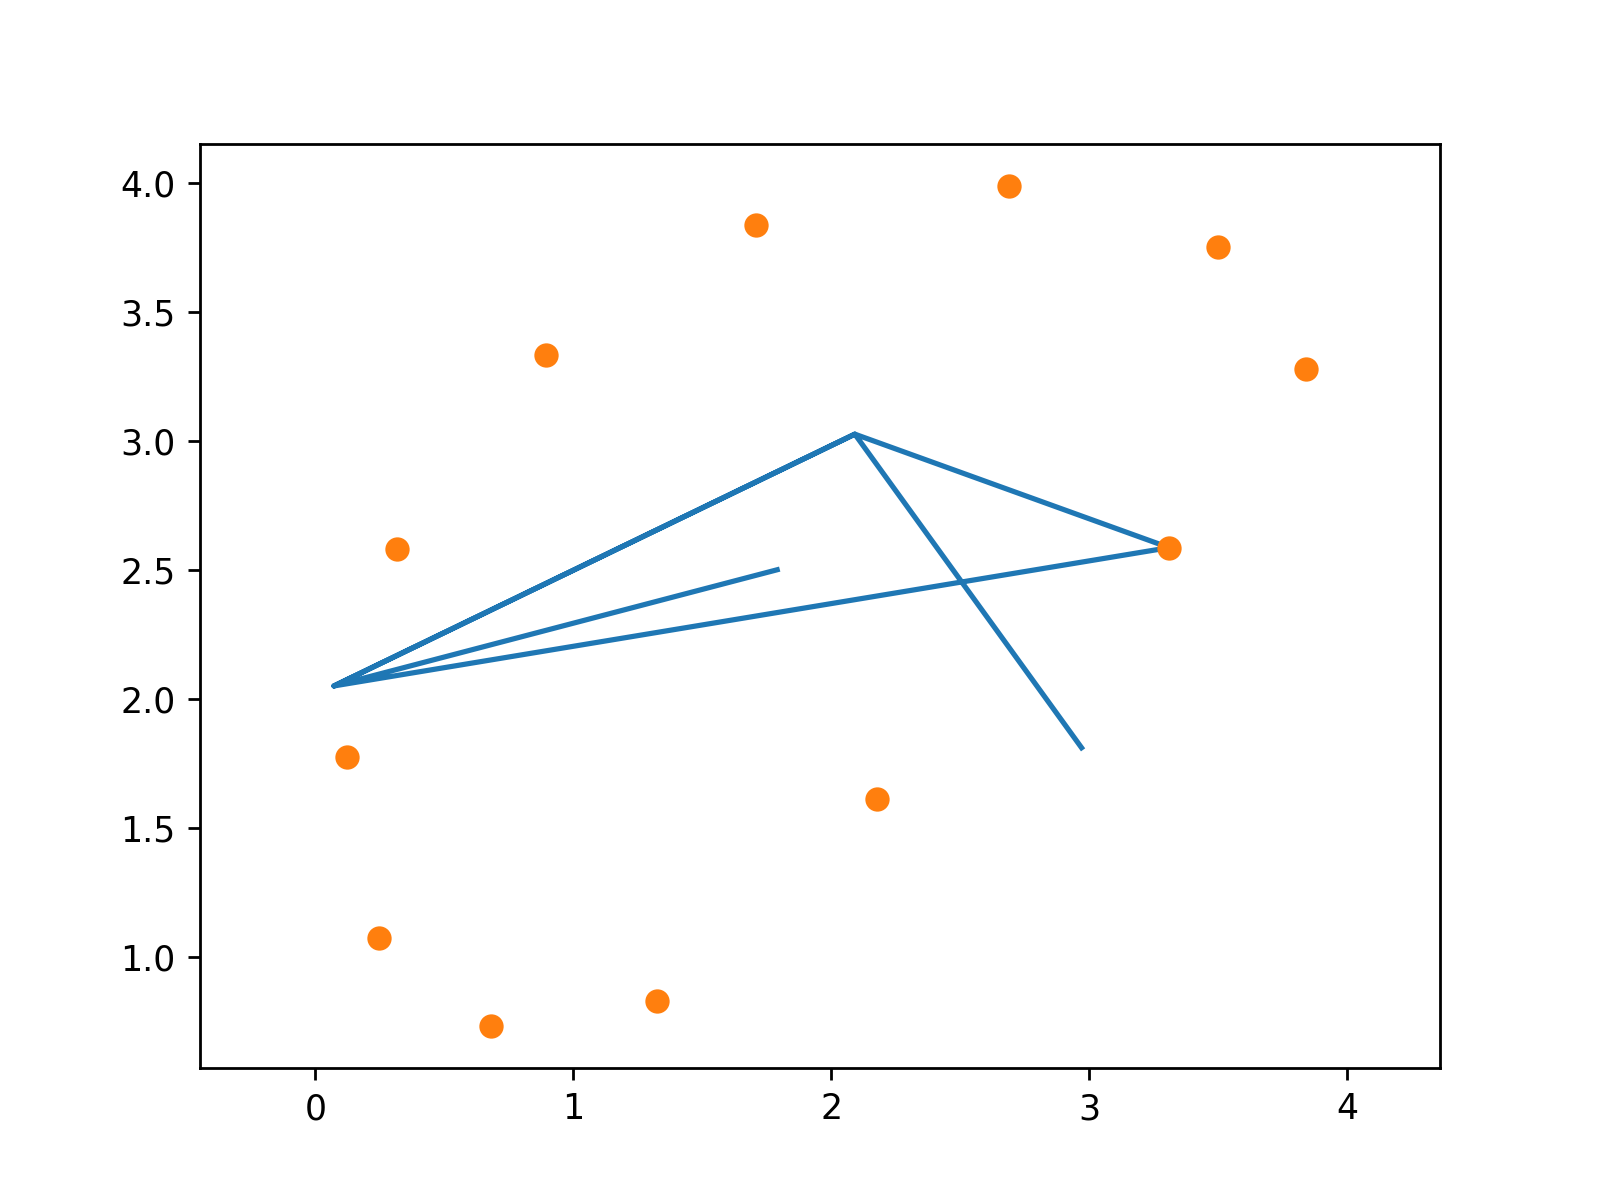

In [4]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
from numba import jit

from scipy.optimize import minimize 

import matplotlib
import matplotlib.pyplot as plt

# converts to degrees but may have degrees(x)%360 included
def Degs(x):
    return((degrees(x)))

# set up the symbols
d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12 = symbols("g2 g3 g4 g5 g6 g7 g8 g9 g10 g11 g12", real=True)
s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12 = symbols("s2 s3 s4 s5 s6 s7 s8 s9 s10 s11 s12",real=True)
Oad,Oat,Obd,Obt = symbols("Oad Oat Obd Obt")

# set up given information
# 12 precision coupler points
c1 = 4.20*exp(I*radians(38.0)) 
c2 = 5.05*exp(I*radians(40.5)) 
c3 = 5.13*exp(I*radians(47.0)) 
c4 = 4.81*exp(I*radians(56.0)) 
c5 = 4.20*exp(I*radians(66.0))
c6 = 3.45*exp(I*radians(75.0)) 
c7 = 2.60*exp(I*radians(83.0)) 
c8 = 1.78*exp(I*radians(86.0)) 
c9 = 1.10*exp(I*radians(77.0)) 
c10 = 1.00*exp(I*radians(47.0)) 
c11 = 1.56*exp(I*radians(32.0)) 
c12 = 2.71*exp(I*radians(36.5)) 

# 12 given phi angles
p1 = radians(0)
p2 = radians(30)
p3 = radians(60)
p4 = radians(90)
p5 = radians(120)
p6 = radians(150)
p7 = radians(180)
p8 = radians(210)
p9 = radians(240)
p10 = radians(270)
p11 = radians(300)
p12 = radians(330)

# *** Ground Pivot 
# *** Set GPOA & GPOB flags=True, if you are setting Oa & Ob Or set either one.
# if True, then you can set the ground pivot
GPOA = True
GPOB = True

if GPOA : 
    Oa = 1.79 + 2.5*I
else :
    Oa = Oad*exp(I*Oat)

if GPOB :
    Ob = 2.97 + 1.81*I
else :
    Ob = Obd*exp(I*Obt)

# vectors for two dyads
r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

# deltas 
del2 = c2-c1
del3 = c3-c1
del4 = c4-c1
del5 = c5-c1
del6 = c6-c1
del7 = c7-c1
del8 = c8-c1
del9 = c9-c1
del10 = c10-c1
del11 = c11-c1
del12 = c12-c1


# LEFT SIDE #
#write out the absolute equations for left side of linkage 
posl1 = Oa+r1+r2 - c1
posl2 = Oa+r1*exp(I*p2) + r2*exp(I*g2) - c2
posl3 = Oa+r1*exp(I*p3) + r2*exp(I*g3) - c3
posl4 = Oa+r1*exp(I*p4) + r2*exp(I*g4) - c4
posl5 = Oa+r1*exp(I*p5) + r2*exp(I*g5) - c5
posl6 = Oa+r1*exp(I*p6) + r2*exp(I*g6) - c6
posl7 = Oa+r1*exp(I*p7) + r2*exp(I*g7) - c7
posl8 = Oa+r1*exp(I*p8) + r2*exp(I*g8) - c8
posl9 = Oa+r1*exp(I*p9) + r2*exp(I*g9) - c9
posl10 = Oa+r1*exp(I*p10) + r2*exp(I*g10) - c10
posl11 = Oa+r1*exp(I*p11) + r2*exp(I*g11) - c11
posl12 = Oa+r1*exp(I*p12) + r2*exp(I*g12) - c12


# objective function using dyad-standard plus one absolute equation 

def psl (x):
    if GPOA :
        tst1 = Oa  +((x[0]*exp(I*x[1])) +   (x[2]*exp(I*x[3]))  - c1)
    else : 
        tst1 = (x[15]*exp(I*x[16])) +((x[0]*exp(I*x[1])) +   (x[2]*exp(I*x[3]))  - c1)
        
    tst2 = ((x[0]*exp(I*x[1]))*(exp(I*p2)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[4])-1) - del2)
    tst3 = ((x[0]*exp(I*x[1]))*(exp(I*p3)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[5])-1) - del3)
    tst4 = ((x[0]*exp(I*x[1]))*(exp(I*p4)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[6])-1) - del4)
    tst5 = ((x[0]*exp(I*x[1]))*(exp(I*p5)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[7])-1) - del5)
    tst6 = ((x[0]*exp(I*x[1]))*(exp(I*p6)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[8])-1) - del6)
    tst7 = ((x[0]*exp(I*x[1]))*(exp(I*p7)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[9])-1) - del7)
    tst8 = ((x[0]*exp(I*x[1]))*(exp(I*p8)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[10])-1) - del8)
    tst9 = ((x[0]*exp(I*x[1]))*(exp(I*p9)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[11])-1) - del9)
    tst10 = ((x[0]*exp(I*x[1]))*(exp(I*p10)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[12])-1) - del10)
    tst11 = ((x[0]*exp(I*x[1]))*(exp(I*p11)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[13])-1) - del11)
    tst12 = ((x[0]*exp(I*x[1]))*(exp(I*p12)-1) + (x[2]*exp(I*x[3]))*(exp(I*x[14])-1) - del12)
            
    return (re(tst1)**2 + im(tst1)**2+ re(tst2)**2 + im(tst2)**2 + re(tst3)**2 + im(tst3)**2 + 
           re(tst4)**2 + im(tst4)**2 + re(tst5)**2 + im(tst5)**2 + re(tst6)**2 + im(tst6)**2 +
           re(tst7)**2 + im(tst7)**2+ re(tst8)**2 + im(tst8)**2+ re(tst9)**2 + im(tst9)**2 +
           re(tst10)**2 + im(tst10)**2+ re(tst11)**2 + im(tst11)**2+ re(tst12)**2 + im(tst12)**2)

# vector of initial guesses for the left-side objective function 
if GPOA :
    x = [3,radians(10),2,radians(35),  radians(30),radians(60),radians(90),radians(120), radians(150),
                                radians(180),radians(210),radians(240),radians(270),radians(300), radians(330)  ]
else : 
    x = [3,radians(10),2,radians(35),  radians(30),radians(60),radians(90),radians(120), radians(150),
                radians(180),radians(210),radians(240),radians(270),radians(300), radians(330),  4, radians(2)  ]

tst = psl(x) 
print( "psl =", re(tst),im(tst))

# BFGS seems to be the fastest for this objective function
# minimize returns a table of results, if you want to know, then print(res)
res = minimize(psl, x,tol=1.0e-2,method='BFGS')
#res = minimize(psl, x,tol=1.0e-9,method='SLSQP')
#res = minimize(psl, x,tol=1.0e-3,method='CG')
#res = minimize(psl, x,tol=1.0e-4)
            
print(" *** relative solution ***")
print()

print("res.fun=",res.fun)
if GPOA :
    print("res.x= <",res.x[0],Degs(res.x[1]),res.x[2],Degs(res.x[3]),">",Degs(res.x[4]),Degs(res.x[5]),
            Degs(res.x[6]),Degs(res.x[7]),Degs(res.x[8]),Degs(res.x[9]),Degs(res.x[10]),
            Degs(res.x[11]),Degs(res.x[12]),Degs(res.x[13]),Degs(res.x[14]))
else :
    print("res.x= <",res.x[0],Degs(res.x[1]),res.x[2],Degs(res.x[3]),">",Degs(res.x[4]),Degs(res.x[5]),
            Degs(res.x[6]),Degs(res.x[7]),Degs(res.x[8]),Degs(res.x[9]),Degs(res.x[10]),
            Degs(res.x[11]),Degs(res.x[12]),Degs(res.x[13]),Degs(res.x[14]),res.x[15],Degs(res.x[16]))
if GPOA :
    str = {d1:res.x[0],t1:res.x[1],d2:res.x[2],t2:res.x[3], g2:res.x[4],g3:res.x[5],g4:res.x[6],g5:res.x[7],
          g6:res.x[8],g7:res.x[9],g8:res.x[10],g9:res.x[11],g10:res.x[12],g11:res.x[13],g12:res.x[14]}
else : 
    str = {d1:res.x[0],t1:res.x[1],d2:res.x[2],t2:res.x[3], g2:res.x[4],g3:res.x[5],g4:res.x[6],g5:res.x[7],
          g6:res.x[8],g7:res.x[9],g8:res.x[10],g9:res.x[11],g10:res.x[12],g11:res.x[13],g12:res.x[14],
             Oad:res.x[15],Oat:res.x[16]}

                                
print ("abs(posl1)=",N(abs(posl1.evalf(subs=str) ),3))
print ("abs(posl2)=",N(abs(posl2.evalf(subs=str) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs=str) ),3))
print ("abs(posl4)=",N(abs(posl4.evalf(subs=str) ),3))
print ("abs(posl5)=",N(abs(posl5.evalf(subs=str) ),3))
print ("abs(posl6)=",N(abs(posl6.evalf(subs=str) ),3))
print ("abs(posl7)=",N(abs(posl7.evalf(subs=str) ),3))
print ("abs(posl8)=",N(abs(posl8.evalf(subs=str) ),3))
print ("abs(posl9)=",N(abs(posl9.evalf(subs=str) ),3))
print ("abs(posl10)=",N(abs(posl10.evalf(subs=str) ),3))
print ("abs(posl11)=",N(abs(posl11.evalf(subs=str) ),3))
print ("abs(posl12)=",N(abs(posl12.evalf(subs=str) ),3))

if GPOA :
    evalOa = Oa
else :
    evalOa = N(Oa.evalf(subs={Oad:res.x[15],Oat:res.x[16]}),3)

evalr1 = N(r1.evalf(subs={d1:res.x[0],t1:res.x[1]}),3)
evalr2 = N(r2.evalf(subs={d2:res.x[2],t2:res.x[3]}),3)



#  *** right side ***

# set gamma values from the results of the optimization
g2a = res.x[4]
g3a = res.x[5]
g4a = res.x[6]
g5a = res.x[7]
g6a = res.x[8]
g7a = res.x[9]
g8a = res.x[10]
g9a = res.x[11]
g10a = res.x[12]
g11a = res.x[13]
g12a = res.x[14]

# *** the dyad-standard approach plus one absolute equation with B*exp(I*theta_B) to (0,0) ***
posr1 = Ob+r3+r4 - c1
posr2 = r3*(exp(I*s2)-1) + r4*(exp(I*g2a)-1) - del2
posr3 = r3*(exp(I*s3)-1) + r4*(exp(I*g3a)-1) - del3
posr4 = r3*(exp(I*s4)-1) + r4*(exp(I*g4a)-1) - del4
posr5 = r3*(exp(I*s5)-1) + r4*(exp(I*g5a)-1) - del5
posr6 = r3*(exp(I*s6)-1) + r4*(exp(I*g6a)-1) - del6
posr7 = r3*(exp(I*s7)-1) + r4*(exp(I*g7a)-1) - del7
posr8 = r3*(exp(I*s8)-1) + r4*(exp(I*g8a)-1) - del8
posr9 = r3*(exp(I*s9)-1) + r4*(exp(I*g9a)-1) - del9
posr10 = r3*(exp(I*s10)-1) + r4*(exp(I*g10a)-1) - del10
posr11 = r3*(exp(I*s12)-1) + r4*(exp(I*g11a)-1) - del11
posr12 = r3*(exp(I*s12)-1) + r4*(exp(I*g12a)-1) - del12

# vector of initial guesses to objective function 



# object funtions for right side
# x[0] = d3, x[1] = t3, x[2]=d4, x[3]=t4, x[4]-x[14]=s2-s12, x[15]=Obd, x[16]=Obt
def psr (x):
    if GPOB :
        tst1 = (Ob) +((x[0]*exp(I*x[1])) +   (x[2]*exp(I*x[3]))  - c1)
    else :
        tst1 = (x[15]*exp(I*x[16])) +((x[0]*exp(I*x[1])) +   (x[2]*exp(I*x[3]))  - c1)
        
    tst2 = ((x[0]*exp(I*x[1]))*(exp(I*x[4])-1) + (x[2]*exp(I*x[3]))*(exp(I*g2a)-1) - del2)
    tst3 = ((x[0]*exp(I*x[1]))*(exp(I*x[5])-1) + (x[2]*exp(I*x[3]))*(exp(I*g3a)-1) - del3)
    tst4 = ((x[0]*exp(I*x[1]))*(exp(I*x[6])-1) + (x[2]*exp(I*x[3]))*(exp(I*g4a)-1) - del4)
    tst5 = ((x[0]*exp(I*x[1]))*(exp(I*x[7])-1) + (x[2]*exp(I*x[3]))*(exp(I*g5a)-1) - del5)
    tst6 = ((x[0]*exp(I*x[1]))*(exp(I*x[8])-1) + (x[2]*exp(I*x[3]))*(exp(I*g6a)-1) - del6)
    tst7 = ((x[0]*exp(I*x[1]))*(exp(I*x[9])-1) + (x[2]*exp(I*x[3]))*(exp(I*g7a)-1) - del7)
    tst8 = ((x[0]*exp(I*x[1]))*(exp(I*x[10])-1) + (x[2]*exp(I*x[3]))*(exp(I*g8a)-1) - del8)
    tst9 = ((x[0]*exp(I*x[1]))*(exp(I*x[11])-1) + (x[2]*exp(I*x[3]))*(exp(I*g9a)-1) - del9)
    tst10 = ((x[0]*exp(I*x[1]))*(exp(I*x[12])-1) + (x[2]*exp(I*x[3]))*(exp(I*g10a)-1) - del10)
    tst11 = ((x[0]*exp(I*x[1]))*(exp(I*x[13])-1) + (x[2]*exp(I*x[3]))*(exp(I*g11a)-1) - del11)
    tst12 = ((x[0]*exp(I*x[1]))*(exp(I*x[14])-1) + (x[2]*exp(I*x[3]))*(exp(I*g12a)-1) - del12)
            
    return (re(tst1)**2 + im(tst1)**2+ re(tst2)**2 + im(tst2)**2 + re(tst3)**2 + im(tst3)**2 + 
           re(tst4)**2 + im(tst4)**2 + re(tst5)**2 + im(tst5)**2 + re(tst6)**2 + im(tst6)**2 +
           re(tst7)**2 + im(tst7)**2+ re(tst8)**2 + im(tst8)**2+ re(tst9)**2 + im(tst9)**2 +
           re(tst10)**2 + im(tst10)**2+ re(tst11)**2 + im(tst11)**2+ re(tst12)**2 + im(tst12)**2)

# vector of initial guesses to objective function 
if GPOB :
    x = [4,radians(60),3,radians(-120),
         radians(30),radians(60),radians(90),radians(-120),radians(-150),
         radians(-180),radians(-210),radians(240),radians(270),radians(300),radians(330)]
else:     
    x = [4,radians(60),3,radians(-120),
         radians(30),radians(60),radians(90),radians(-120),radians(-150),
         radians(-180),radians(-210),radians(240),radians(270),radians(300),radians(330),10,radians(102)]


tst = psr(x) 
print()
print( "psr =", re(tst),im(tst))
print()
print("*** right side solution ***")

# BFGS seems to be the fastest for this objective function
# minimize returns a table of results, if you want to know, then print(res)
#res = minimize(psr, x,tol=1.0e-2,method='BFGS')
#res = minimize(psr, x,tol=1.0e-9,method='SLSQP')
#res = minimize(psr, x,tol=1.0e-3,method='CG')
res = minimize(psr, x)

print()

print("res.fun=",res.fun)

if GPOB :
    print("res.x=<",res.x[0],Degs(res.x[1]),x[2],Degs(res.x[3]),">",Degs(res.x[4]),Degs(res.x[5]),
          Degs(res.x[6]),Degs(res.x[7]),Degs(res.x[8]),Degs(res.x[9]),Degs(res.x[10]),Degs(res.x[11]),
          Degs(res.x[12]),Degs(res.x[13]),Degs(res.x[14]))
else :   
    print("res.x=<",res.x[0],Degs(res.x[1]),x[2],Degs(res.x[3]),">",Degs(res.x[4]),Degs(res.x[5]),
          Degs(res.x[6]),Degs(res.x[7]),Degs(res.x[8]),Degs(res.x[9]),Degs(res.x[10]),Degs(res.x[11]),
          Degs(res.x[12]),Degs(res.x[13]),Degs(res.x[14]),res.x[15],Degs(res.x[16]))

if GPOB :   
    str = {d3:res.x[0],t3:res.x[1],d4:res.x[2],t4:res.x[3], s2:res.x[4],s3:res.x[5],s4:res.x[6],s5:res.x[7],
           s6:res.x[8], s7:res.x[9],s8:res.x[10],s9:res.x[11],s10:res.x[12],s11:res.x[13],s12:res.x[14] }
else :
    str = {d3:res.x[0],t3:res.x[1],d4:res.x[2],t4:res.x[3], s2:res.x[4],s3:res.x[5],s4:res.x[6],s5:res.x[7],
           s6:res.x[8], s7:res.x[9],s8:res.x[10],s9:res.x[11],s10:res.x[12],s11:res.x[13],s12:res.x[14],
          Obd:res.x[15],Obt:res.x[16]}
                                
print ("abs(posr1)=",N(abs(posr1.evalf(subs=str) ),3))
print ("abs(posr2)=",N(abs(posr2.evalf(subs=str) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs=str) ),3))
print ("abs(posr4)=",N(abs(posr4.evalf(subs=str) ),3))
print ("abs(posr5)=",N(abs(posr5.evalf(subs=str) ),3))
print ("abs(posr6)=",N(abs(posr6.evalf(subs=str) ),3))
print ("abs(posr7)=",N(abs(posr7.evalf(subs=str) ),3))
print ("abs(posr8)=",N(abs(posr8.evalf(subs=str) ),3))
print ("abs(posr9)=",N(abs(posr9.evalf(subs=str) ),3))
print ("abs(posr10)=",N(abs(posr10.evalf(subs=str) ),3))
print ("abs(posr11)=",N(abs(posr11.evalf(subs=str) ),3))
print ("abs(posr12)=",N(abs(posr12.evalf(subs=str) ),3))

evalr3 = N(r3.evalf(subs={d3:res.x[0],t3:res.x[1]}),3)
evalr4 = N(r4.evalf(subs={d4:res.x[2],t4:res.x[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

if GPOB : 
    evalOb = Ob
else :
    evalOb = N(Ob.evalf(subs={Obd:res.x[15],Obt:res.x[16]}),3)


print("Oa = (",evalOa,")  (", abs(evalOa),"@",degrees(arg(evalOa)),"degs)")
print("Ob = (",evalOb,")  (", abs(evalOb),"@",degrees(arg(evalOb)),"degs)")
print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

print("Oa = (",evalOa,")")
print("A = (",evalOa+evalr1,")")
print("C = (",evalOa+evalr1+evalr2,")")
print("B = (",evalOa+evalr1+evalr2-evalr4,")")
print("Ob = (",evalOa+evalr1+evalr2-evalr4-evalr3,")")

# call matplotlib routines for a scatter plot
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalOa+evalr1),re(c1),re(evalOa+evalr1+evalr2-evalr4),re(evalOa+evalr1),re(evalOa+evalr1+evalr2-evalr4),re(evalOb)],
        [im(evalOa),im(evalOa+evalr1),im(c1),im(evalOa+evalr1+evalr2-evalr4),im(evalOa+evalr1),im(evalOa+evalr1+evalr2-evalr4),im(evalOb)],
        [re(c1),re(c2),re(c3),re(c4),re(c5),re(c6),re(c7),re(c8),re(c9),re(c10),re(c11),re(c12)],
        [im(c1),im(c2),im(c3),im(c4),im(c5),im(c6),im(c7),im(c8),im(c9),im(c10),im(c11),im(c12)],'o')
ax.set_aspect('equal',adjustable='datalim')
plt.show()

